### Cuantificación
Antes del procesamiento de las imágenes, se debe generar una cuantificación de estas dependiendo su categoría con el fin de identificar desbalanceos. 

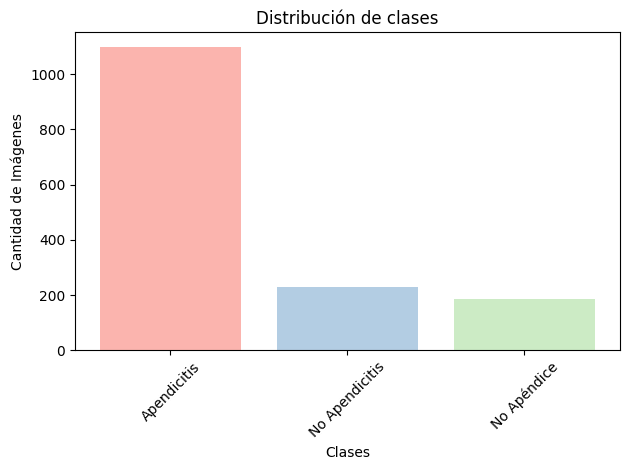


    Apendicitis: 1097, 
    No Apendicitis: 231,
    No Apéndice: 186



In [1]:
# ia_data_4.py

import pandas as pd
import os
import matplotlib.pyplot as plt

# Rutas de archivos
apendicitis = os.listdir(r'us_images\procesar\apendicitis')
no_apendice = os.listdir(r'us_images\procesar\no_apendice')
no_apendicitis = os.listdir(r'us_images\procesar\no_apendicitis')

# Conteo de archivos en cada categoría
count = {
    'Apendicitis': len(apendicitis), 
    'No Apendicitis': len(no_apendicitis),
    'No Apéndice': len(no_apendice)
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(list(count.items()), columns=['Clase', 'Cantidad'])

# Colores pastel
colors = plt.cm.Pastel1.colors

# Crear un gráfico de barras
plt.bar(df['Clase'], df['Cantidad'], color = colors)
plt.xlabel('Clases')
plt.ylabel('Cantidad de Imágenes')
plt.title('Distribución de clases')
plt.xticks(rotation=45)  # Rotar las etiquetas si son demasiado largas
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

# Información para balancear
print(f'''
    Apendicitis: {len(apendicitis)}, 
    No Apendicitis: {len(no_apendicitis)},
    No Apéndice: {len(no_apendice)}
''')

# Creación Data Generator

In [2]:
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

# Se instancia un objeto de la clase ImageDataGenerator, el cual aplicará 
# transformaciones en las imágenes para aumentar la variedad de datos.
datagen = ImageDataGenerator(
    rescale=1. / 255,  # Normalizar: Reescalar los valores de los píxeles para que estén entre 0 y 1
    rotation_range = 30, # Rango de grados para rotaciones aleatorias de las imágenes.
    width_shift_range=0.12, # Rango (como fracción del total) para traslados horizontales aleatorios.
    height_shift_range=0.12, # Rango (como fracción del total) para traslados verticales aleatorios.
    shear_range=3, # Intensidad de corte para aplicar cortes aleatorios en las imágenes.
    zoom_range=[0.9, 1.5], # Rango para aplicar zoom aleatorio. 
    fill_mode="nearest",
    validation_split=0.2 # Porcentaje de los datos que se reservará para el conjunto de validación.
)


## Cración de imagenes sinteticas

In [4]:
import shutil

def augment_and_save_images(datagen, input_dir, output_dir, num_augmented_images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    i = 0
    for image_name in os.listdir(input_dir):
        if i >= num_augmented_images:  # check the counter before processing each image
            break

        img_path = os.path.join(input_dir, image_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= num_augmented_images:
                break  # this will only break the inner loop

    # Copy original images to the output directory
    for image_name in os.listdir(input_dir):
        shutil.copy(os.path.join(input_dir, image_name), output_dir)


# Rutas de archivos
apendicitis = os.listdir(r'us_images\procesar\apendicitis')
no_apendice = os.listdir(r'us_images\procesar\no_apendice')
no_apendicitis = os.listdir(r'us_images\procesar\no_apendicitis')

# Paths to input and output directories
input_dir_no_appendicitis = r'us_images\procesar\no_apendicitis'
output_dir_no_appendicitis = r'original+synthetic\no_apendicitis'

input_dir_no_appendix = r'us_images\procesar\no_apendice'
output_dir_no_appendix = r'original+synthetic\no_apendice'

input_dir_apendicitis = r'us_images\procesar\apendicitis'
output_dir_apendicitis = r'original+synthetic\apendicitis'

target_image_number = 1500

num_augmented_images_no_appendicitis = target_image_number - len(no_apendicitis)
num_augmented_images_no_apendice = target_image_number - len(no_apendice)
num_augmented_images_apendicitis = target_image_number - len(apendicitis)

# Augment and save images
augment_and_save_images(datagen, input_dir_no_appendicitis, output_dir_no_appendicitis, num_augmented_images=num_augmented_images_no_appendicitis)
augment_and_save_images(datagen, input_dir_no_appendix, output_dir_no_appendix, num_augmented_images=num_augmented_images_no_apendice)
augment_and_save_images(datagen, input_dir_apendicitis, output_dir_apendicitis, num_augmented_images=num_augmented_images_apendicitis)

Found 3474 images belonging to 3 classes.
Found 866 images belonging to 3 classes.
Classes in training set:  {'apendicitis': 0, 'no_apendice': 1, 'no_apendicitis': 2}
Classes in validation set:  {'apendicitis': 0, 'no_apendice': 1, 'no_apendicitis': 2}
Number of elements in each class in the training set:  {0: 1192, 1: 1140, 2: 1142}
Number of elements in each class in the validation set:  {0: 297, 1: 284, 2: 285}


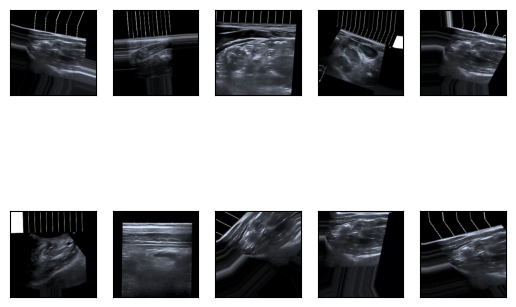

In [5]:
# Ubicación de las imágenes ordenadas
database = r'original+synthetic'
img_size = 224

data_gen_entrenamiento = datagen.flow_from_directory(database, target_size=(img_size,img_size),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory(database, target_size=(img_size,img_size),
                                                     batch_size=32, shuffle=True, subset='validation')

# Print class indices
print("Classes in training set: ", data_gen_entrenamiento.class_indices)
print("Classes in validation set: ", data_gen_pruebas.class_indices)

# Count the number of elements in each class in the training set
unique, counts = np.unique(data_gen_entrenamiento.labels, return_counts=True)
print("Number of elements in each class in the training set: ", dict(zip(unique, counts)))

# Count the number of elements in each class in the validation set
unique, counts = np.unique(data_gen_pruebas.labels, return_counts=True)
print("Number of elements in each class in the validation set: ", dict(zip(unique, counts)))

# Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

# Inicia la Prueba de Modelos!

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(data_gen, model, valid_steps, ax):
    # Get the true labels
    y_true = data_gen.classes

    # Predict the values from the validation dataset
    Y_pred = model.predict(data_gen, valid_steps)
    
    # Convert predictions classes to one hot vectors 
    y_pred = np.argmax(Y_pred, axis=1)

    # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_true, y_pred) 

    # plot the confusion matrix
    sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Calculate and print % of correct guesses for each class
    class_labels = data_gen.class_indices
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(report)

def plot_multiple_models(model_histories, data_gen_pruebas, valid_steps):
    num_models = len(model_histories)
    
    # Create a figure with 2 subplots for each model (one for training history, one for confusion matrix)
    fig, axs = plt.subplots(num_models, 2, figsize=(15, num_models*5))
    
    for i, (model_name, history) in enumerate(model_histories.items()):
        # Plot training history
        axs[i, 0].set_title(f'Training History for {model_name}')
        axs[i, 0].plot(history.history['accuracy'])
        axs[i, 0].plot(history.history['val_accuracy'])
        axs[i, 0].set_ylabel('Accuracy')
        axs[i, 0].set_xlabel('Epoch')
        axs[i, 0].legend(['Train', 'Validation'], loc='upper left')
        
        # Plot confusion matrix
        axs[i, 1].set_title(f'Confusion Matrix for {model_name}')
        plot_confusion_matrix(data_gen_pruebas, history.model, valid_steps, axs[i, 1])
        
    plt.tight_layout()
    plt.show()

# Se crean los modelos

In [12]:
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam

# Definir el modelo
def CNN_1(size=150, opt= Adam()):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Ajusta la salida según tu problema
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Ajusta la configuración según sea necesario
    return model

# Definir el modelo
def CNN_2(size=150, opt= Adam()):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Ajusta la salida según tu problema
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Ajusta la configuración según sea necesario
    return model

# Definir el modelo
def CNN_3(size=150, opt= Adam()):
    model = Sequential([
        Conv2D(300, (3, 3), activation='relu', input_shape=(size, size, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(12, activation='relu'),
        Dense(3, activation='softmax')  # Ajusta la salida según tu problema
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Ajusta la configuración según sea necesario
    return model


# Pruebas

In [11]:
from keras.callbacks import EarlyStopping
opt = Adam(learning_rate=0.0001)
simpleCNN = CNN_1(img_size, opt)

# Define the number of training and validation steps
train_steps = data_gen_entrenamiento.samples // data_gen_entrenamiento.batch_size
valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_simpleCNN = simpleCNN.fit(
    data_gen_entrenamiento,
    steps_per_epoch=train_steps,
    validation_data=data_gen_pruebas,
    validation_steps=valid_steps,
    callbacks=early_stop,
    epochs=35  # replace with the number of epochs you want
)

valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

# Plot the training history


C:\Users\escob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 107s 961ms/step - accuracy: 0.6828 - loss: 0.7168 - val_accuracy: 0.4444 - val_loss: 2.1693
Epoch 2/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4022 - val_accuracy: 0.5000 - val_loss: 1.8268
Epoch 3/35


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


108/108 ━━━━━━━━━━━━━━━━━━━━ 101s 920ms/step - accuracy: 0.8878 - loss: 0.3243 - val_accuracy: 0.4653 - val_loss: 2.4189
Epoch 4/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.9688 - loss: 0.1718 - val_accuracy: 1.0000 - val_loss: 0.2389
Epoch 5/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 104s 947ms/step - accuracy: 0.9210 - loss: 0.2274 - val_accuracy: 0.4792 - val_loss: 2.8078
Epoch 6/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 1.0000 - loss: 0.0423 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 102s 930ms/step - accuracy: 0.9443 - loss: 0.1739 - val_accuracy: 0.4838 - val_loss: 3.0600
Epoch 8/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.9375 - loss: 0.2724 - val_accuracy: 0.0000e+00 - val_loss: 8.7248
Epoch 9/35
108/108 ━━━━━━━━━━━━━━━━━━━━ 107s 978ms/step - accuracy: 0.9544 - loss: 0.1376 - val_accuracy: 0.4931 - val_loss: 3.7044


In [19]:
opt = Adam(learning_rate=0.0001)
scalingCNN = CNN_2(img_size, opt)

# Define the number of training and validation steps
train_steps = data_gen_entrenamiento.samples // data_gen_entrenamiento.batch_size
valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

# Train the model
history_scalingCNN = scalingCNN.fit(
    data_gen_entrenamiento,
    steps_per_epoch=train_steps,
    validation_data=data_gen_pruebas,
    validation_steps=valid_steps,
    callbacks=early_stop,
    epochs=35  # replace with the number of epochs you want
)

Epoch 1/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 168s 814ms/step - accuracy: 0.5249 - loss: 0.9353 - val_accuracy: 0.6150 - val_loss: 1.0431
Epoch 2/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7500 - loss: 0.5217 - val_accuracy: 0.7200 - val_loss: 1.1244
Epoch 3/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 164s 799ms/step - accuracy: 0.8067 - loss: 0.5047 - val_accuracy: 0.6313 - val_loss: 1.3355


In [22]:
opt = Adam(learning_rate=0.0001)
conventionalCNN = CNN_3(img_size, opt)

# Define the number of training and validation steps
train_steps = data_gen_entrenamiento.samples // data_gen_entrenamiento.batch_size
valid_steps = data_gen_pruebas.samples // data_gen_pruebas.batch_size

# Train the model
history_conventionalCNN = conventionalCNN.fit(
    data_gen_entrenamiento,
    steps_per_epoch=train_steps,
    validation_data=data_gen_pruebas,
    validation_steps=valid_steps,
    callbacks=early_stop,
    epochs=35  # replace with the number of epochs you want
)

Epoch 1/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 1208s 6s/step - accuracy: 0.6954 - loss: 0.6914 - val_accuracy: 0.6263 - val_loss: 1.6083
Epoch 2/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9688 - loss: 0.1153 - val_accuracy: 0.6000 - val_loss: 0.9469
Epoch 3/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 1210s 6s/step - accuracy: 0.9502 - loss: 0.1514 - val_accuracy: 0.6856 - val_loss: 2.1535


# Información pruebas inciales

51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 404ms/step
                precision    recall  f1-score   support

   apendicitis       0.34      0.51      0.41       564
   no_apendice       0.33      0.23      0.27       529
no_apendicitis       0.33      0.24      0.28       532

      accuracy                           0.33      1625
     macro avg       0.33      0.33      0.32      1625
  weighted avg       0.33      0.33      0.32      1625

51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step
                precision    recall  f1-score   support

   apendicitis       0.35      0.39      0.37       564
   no_apendice       0.33      0.34      0.34       529
no_apendicitis       0.34      0.28      0.31       532

      accuracy                           0.34      1625
     macro avg       0.34      0.34      0.34      1625
  weighted avg       0.34      0.34      0.34      1625

51/51 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
                precision    recall  f1-score   support

   apendicitis       0.34     

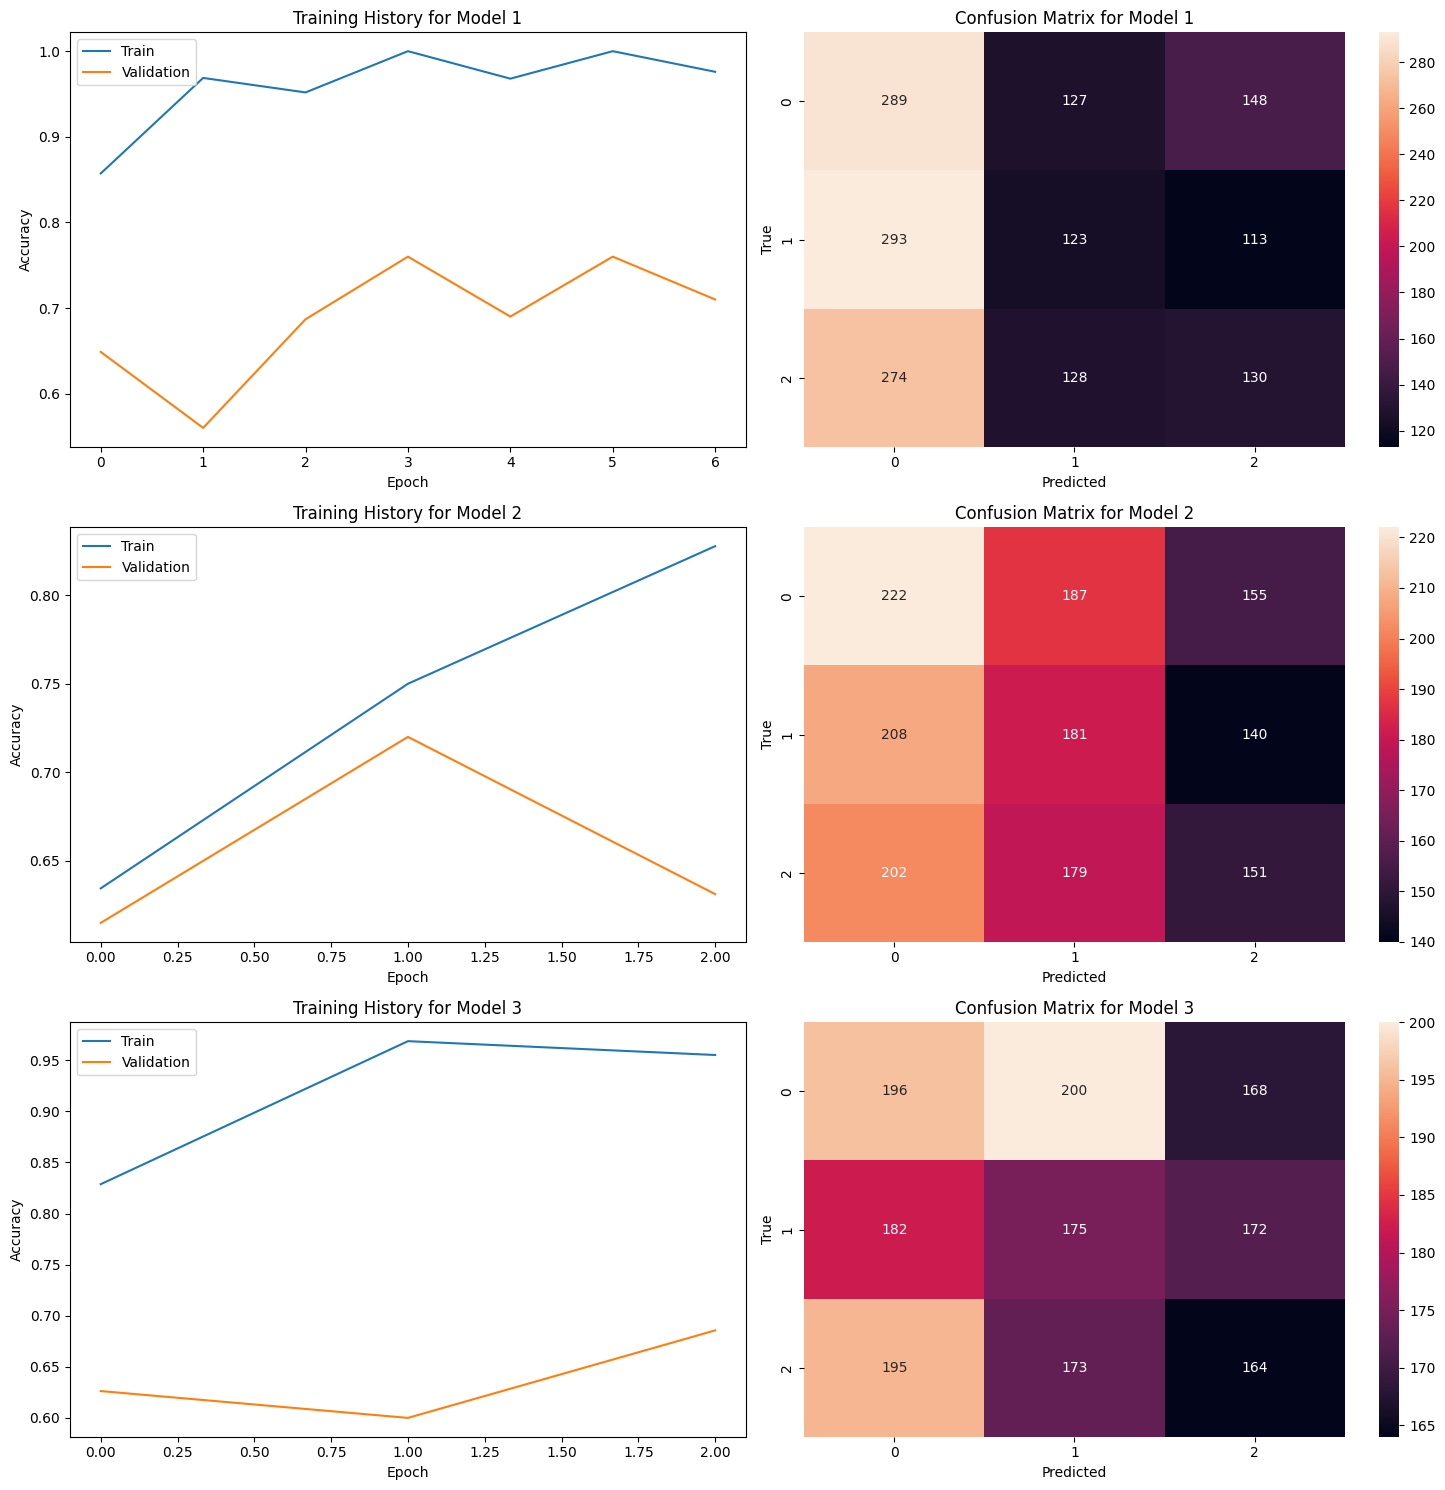

In [23]:
#plot_training_history(history_simpleCNN)
#plot_confusion_matrix(data_gen_pruebas, simpleCNN, valid_steps)

# Put the histories in a dictionary with the model names as keys
model_histories = {
    'Model 1': history_simpleCNN,
    'Model 2': history_scalingCNN,
    'Model 3': history_conventionalCNN
}

# Use the function to plot the training history and confusion matrix for each model
plot_multiple_models(model_histories, data_gen_pruebas, valid_steps)

# Transfer Learning -- MobileNetv2 

In [13]:
#Aquí se muestra cómo usar MobileNetV2 en TensorFlow:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### se crea el modelo base

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

# Cargar MobileNetV2 sin las capas densas (solo las capas convolucionales)
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Visualizar la arquitectura del modelo
plot_model(base_model, to_file='mobilenetv2.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Crear el modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

mobileNetv2_1 = Model(inputs=base_model.input, outputs=predictions)

# Congelar todas las capas de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False 

# Entrenar el modelo
# Set the learning rate
lr = 0.0001
opt = Adam(learning_rate=lr) # Instantiate the optimizer

# Compilar el modelo
mobileNetv2_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history_mobileNetv2_1 = mobileNetv2_1.fit(data_gen_entrenamiento, epochs=300, validation_data=data_gen_pruebas, validation_steps=valid_steps, callbacks=[reduce_lr, early_stop])

### se entrenan las capas de la mobile Netv2 desde la 130 y luego la 100

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Crear el modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

mobileNetv2_1 = Model(inputs=base_model.input, outputs=predictions)

""" # Congelar todas las capas de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False """

# Entrenar el modelo
# Set the learning rate
lr = 0.0001
opt = Adam(learning_rate=lr) # Instantiate the optimizer

# Unfreeze the base MobileNet model
base_model.trainable = True 
# Fine-tune from this layer onwards
fine_tune_at = 130
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Compilar el modelo
mobileNetv2_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history_mobileNetv2_1 = mobileNetv2_1.fit(data_gen_entrenamiento, epochs=300, validation_data=data_gen_pruebas, validation_steps=valid_steps, callbacks=[reduce_lr, early_stop])

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Crear el modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

mobileNetv2_1 = Model(inputs=base_model.input, outputs=predictions)

""" # Congelar todas las capas de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False """

# Entrenar el modelo
# Set the learning rate
lr = 0.0001
opt = Adam(learning_rate=lr) # Instantiate the optimizer

# Unfreeze the base MobileNet model
base_model.trainable = True 
# Fine-tune from this layer onwards
fine_tune_at = 100
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Compilar el modelo
mobileNetv2_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history_mobileNetv2_1 = mobileNetv2_1.fit(data_gen_entrenamiento, epochs=300, validation_data=data_gen_pruebas, validation_steps=valid_steps, callbacks=[reduce_lr, early_stop])

# Se entrena la efficientNet desde la 100

In [ ]:
from keras.applications import EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el modelo EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Añadir Dropout para evitar el sobreajuste
predictions = Dense(len(data_gen_entrenamiento.class_indices), activation='softmax')(x)

efficientNet_model = Model(inputs=base_model.input, outputs=predictions)

# Ajustar las capas congeladas y el optimizador
lr = 0.0001
opt = Adam(learning_rate=lr)  # Instanciar el optimizador

# Descongelar el modelo base de EfficientNetB0
base_model.trainable = True
fine_tune_at = 100  # Ajustar el punto de fine-tuning

# Congelar todas las capas antes de fine_tune_at
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilar el modelo
efficientNet_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history_efficientNet = efficientNet_model.fit(
    data_gen_entrenamiento,
    epochs=300,
    validation_data=data_gen_pruebas,
    validation_steps=valid_steps,
    callbacks=[reduce_lr, early_stop]
)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from keras.utils import to_categorical

def compare_model_metrics(models, dataGenerator):
    metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'ROC AUC']
    
    # Get the true labels
    y_true = dataGenerator.classes
    y_true = to_categorical(y_true, num_classes=len(dataGenerator.class_indices))  # convert to one-hot encoding
    
    results = []
    
    for model in models:
        # Predict the values from the test dataset
        Y_pred = model.predict(dataGenerator)
        
        # Calculate metrics
        accuracy = accuracy_score(y_true, np.round(Y_pred))
        sensitivity = recall_score(y_true, np.round(Y_pred), average='macro')
        specificity = recall_score(y_true, 1-np.round(Y_pred), average='macro')  # specificity is recall of the negative class
        roc_auc = roc_auc_score(y_true, Y_pred, average='macro', multi_class='ovo')
        
        results.append([accuracy, sensitivity, specificity, roc_auc])
    
    print("Model Comparison Metrics:")
    print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Model", *metrics))
    
    for i, model in enumerate(models):
        print("{:<15} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f}".format(f"Model {i+1}", *results[i]))


In [ ]:
# Comparar los modelos
compare_model_metrics([simpleCNN, scalingCNN, conventionalCNN, modelSimpleCNNv2, mobileNetv2_1, efficientNet_model], data_gen_pruebas)

In [ ]:

# Put the histories in a dictionary with the model names as keys
model_histories = {
    'Model 1': history_simpleCNN,
    'Model 2': history_scalingCNN,
    'Model 3': history_conventionalCNN,
    'Model 4': history_modelSimpleCNNv2,
    'Model 5': history_mobileNetv2_1,
    'Model 6': history_efficientNet
}

# Use the function to plot the training history and confusion matrix for each model
plot_multiple_models(model_histories, data_gen_pruebas, valid_steps)

# Use the function to plot the training history and confusion matrix for each model
plot_multiple_models(model_histories, data_gen_pruebas, valid_steps)

## Kfolds Crossvalidation

Finalmente nuestro set de entrenamiento y prueba está listo!

In [ ]:
##  PRUEBA KFOLDS
# Configurar KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Ubicación de las imágenes ordenadas
database = r'us_images\procesar'

# Configurar ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5]
)

data_gen = datagen.flow_from_directory(database, target_size=(150, 150),
                                       batch_size=4, shuffle=True)

# Obtener todas las imágenes y etiquetas
images, labels = [], []
for image, label in data_gen:
    images.append(image)
    labels.append(label)
    if len(images) * 8 >= data_gen.samples:  # Usar el nuevo tamaño del lote
        break

images = np.concatenate(images)
labels = np.concatenate(labels)

# Almacenar las métricas
history_dicts = []
aucs = []

for train_index, val_index in kfold.split(images):
    X_train, X_val = images[train_index], images[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Limitar el número de pasos de entrenamiento por época
    total_steps = len(X_train) // 8  # Tamaño del lote de 16

    model = create_model_simpleCNN()
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val),
                        steps_per_epoch=total_steps)  # Limitar el número de pasos de entrenamiento por época

    history_dicts.append(history.history)

    

In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

# Predicciones de validación
y_val_pred = model.predict(X_val)

# Convertir las etiquetas y las predicciones al formato de clase única
y_val_single = np.argmax(y_val, axis=1)
y_val_pred_single = np.argmax(y_val_pred, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_val_single, y_val_pred_single))

# Convertir las etiquetas al formato binario
y_val_binary = label_binarize(y_val_single, classes=np.unique(y_val_single))

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_val_single))):
    fpr[i], tpr[i], _ = roc_curve(y_val_binary[:, i], y_val_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio de los AUCs
mean_auc = np.mean(list(roc_auc.values()))

# Graficar la curva ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green']  # Puedes ajustar los colores según la cantidad de clases
for i, color in zip(range(len(np.unique(y_val_single))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()